In [13]:
#!/usr/bin/python2.6  
# -*- coding: utf-8 -*-  
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.0.0


In [14]:
train_dir = "/opt/tv/training/training"
valid_dir = "/opt/tv/validation/validation"

dir1 = os.listdir(train_dir)

height = 128
width = 128
channels = 3
batch_size = 16
num_classes = 20

In [15]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    zoom_range = 0.2,
    channel_shift_range=10,
    brightness_range=[0.1, 1],
    fill_mode = 'nearest',
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")

train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num)
print(valid_num)

Found 1100 images belonging to 20 classes.
Found 21 images belonging to 20 classes.
1100
21


In [16]:
model = keras.models.Sequential([

    keras.layers.Conv2D(filters=8, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=8, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),

    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=16, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 8)       224       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 128, 128, 8)       584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)       

In [17]:
epochs = 50
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

Epoch 1/50
68/68 [==============================] - 11s 164ms/step - loss: 2.8662 - accuracy: 0.1494 - val_loss: 2.8822 - val_accuracy: 0.0625
Epoch 2/50
68/68 [==============================] - 11s 159ms/step - loss: 2.3527 - accuracy: 0.2232 - val_loss: 2.4676 - val_accuracy: 0.2500
Epoch 3/50
68/68 [==============================] - 11s 157ms/step - loss: 1.6602 - accuracy: 0.4317 - val_loss: 1.6325 - val_accuracy: 0.2500
Epoch 4/50
68/68 [==============================] - 11s 155ms/step - loss: 1.2982 - accuracy: 0.5406 - val_loss: 1.6409 - val_accuracy: 0.3750
Epoch 5/50
68/68 [==============================] - 11s 157ms/step - loss: 1.1563 - accuracy: 0.5821 - val_loss: 1.0755 - val_accuracy: 0.6250
Epoch 6/50
68/68 [==============================] - 10s 154ms/step - loss: 0.9613 - accuracy: 0.6691 - val_loss: 1.2681 - val_accuracy: 0.6250
Epoch 7/50
68/68 [==============================] - 10s 154ms/step - loss: 0.7845 - accuracy: 0.7037 - val_loss: 1.0344 - val_accuracy: 0.6250

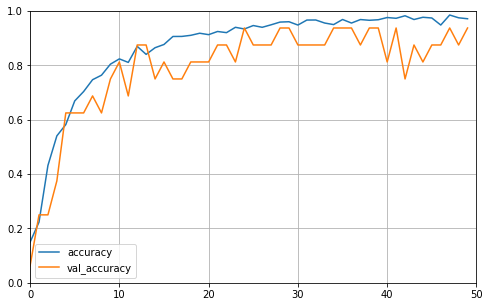

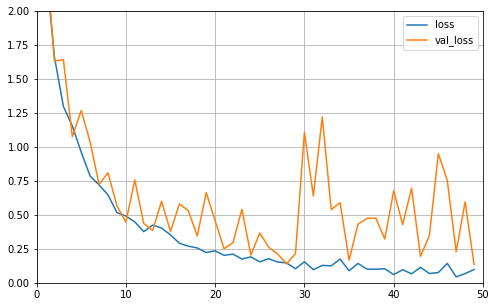

In [18]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 2)

In [19]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    directory = '/opt/tv/validation/validation',
    classes = dir1,
    target_size = (height, width),
    batch_size = batch_size,
    seed = 7,
    shuffle = False,
    class_mode = "categorical")
labels = test_generator.class_indices
labels
filenames = test_generator.filenames
filenames

Found 21 images belonging to 20 classes.


['万宝路/008.jpg',
 '中南海5mg/0018.jpg',
 '中南海8mg/001.jpg',
 '新版利群/004.jpg',
 '泰山红将军/003.jpg',
 '玉溪软/006.jpg',
 '白沙硬/002.jpg',
 '白沙精品二代/009.jpg',
 '苏烟五星/005.jpg',
 '黄山新制皖烟/012.jpg',
 '阿诗玛/0304142236.jpg',
 '好好学习/0304142232.jpg',
 '黄金叶小目标/0304142227.jpg',
 '利群软红/0304142312.jpg',
 '利群阳光/0304142308.jpg',
 '苏烟金砂/0304142241.jpg',
 '中华/0304142249.jpg',
 '中华/0304142253.jpg',
 '泰山大鸡/0304142214.jpg',
 '泰山金将军/0304142258.jpg',
 '玉溪初心/0304142214.jpg']

In [20]:
test_predict = model.predict_generator(test_generator,
                                       workers = 10,
                                       use_multiprocessing = True)

In [21]:
labels = train_generator.class_indices
labels1 = dict(zip(labels.values(),labels.keys()))
for i in range(len(test_predict)):
    pre = np.argmax(test_predict[i])
    print(filenames[i] + labels1[pre])

万宝路/008.jpg万宝路
中南海5mg/0018.jpg中南海5mg
中南海8mg/001.jpg中南海8mg
新版利群/004.jpg新版利群
泰山红将军/003.jpg泰山红将军
玉溪软/006.jpg玉溪软
白沙硬/002.jpg白沙硬
白沙精品二代/009.jpg白沙精品二代
苏烟五星/005.jpg苏烟五星
黄山新制皖烟/012.jpg黄山新制皖烟
阿诗玛/0304142236.jpg阿诗玛
好好学习/0304142232.jpg好好学习
黄金叶小目标/0304142227.jpg黄金叶小目标
利群软红/0304142312.jpg利群软红
利群阳光/0304142308.jpg利群阳光
苏烟金砂/0304142241.jpg黄山新制皖烟
中华/0304142249.jpg中华
中华/0304142253.jpg中华
泰山大鸡/0304142214.jpg玉溪初心
泰山金将军/0304142258.jpg泰山金将军
玉溪初心/0304142214.jpg玉溪初心


In [ ]:
img = image.load_img("/opt/tv/validation/validation/苏烟金砂/0304095219.jpg", target_size = (128, 128))
plt.imshow(img)

In [ ]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
preds = model.predict(img)
i = np.argmax(preds)
labels1[i]

In [ ]:
num_rows = 15
num_cols = 3
num_images = 45
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):    
    x, y = train_generator.next()
    temp_img = image.array_to_img(x[0])
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plt.imshow(temp_img)
plt.show()